### ASTR 3300/5300-003: Astrostatistics
***N. Pol***
___

# Homework 4
### Due: Friday, Feb 21st at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

In [1]:
# Part 1

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

data = np.load('C:/Users/JoeK33p/Documents/GitHub/ASTR_3300_S2025/coursework/homeworks/hw_data/hw4_data_1.npy')
v = data[:,0]
uncert = data[:,1]
s_m = np.mean(v)
st_e = np.mean(uncert)/np.sqrt(len(uncert))
print('The sample mean is', s_m)
print('The standard error is', st_e)

The sample mean is 5.106
The standard error is 0.49932364254058703


In [2]:
# Part 2

def likelihood(mu, voltage, uncertainties):
    like = -0.5*np.sum(((voltage - mu)/uncertainties)**2 + np.log(2*np.pi*uncertainties**2))
    return like

mu_grid = np.linspace(3,7,500)
ln_l = [likelihood(mu, v, uncert) for mu in mu_grid]
b_fit_mu = mu_grid[np.argmax(ln_l)]

print('The best fit mean voltage is', b_fit_mu)

The best fit mean voltage is 4.939879759519038


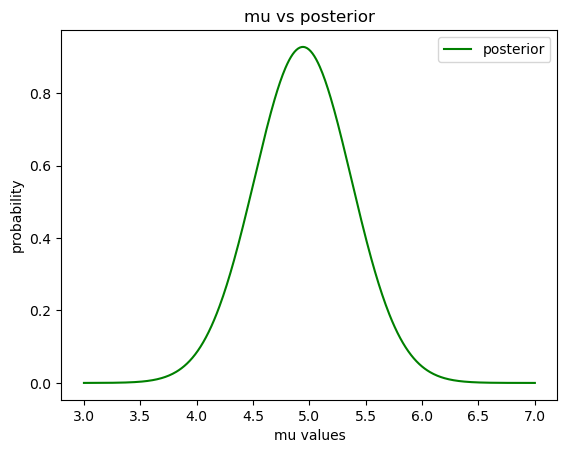

In [3]:
# Part 3

def posterior(mu, voltage, uncertainties, prior):
    post = np.exp(likelihood(mu, voltage, uncertainties)+np.log(prior(mu)))
    return post

p_u_3_7 = lambda mu: 1/4 if 3 <= mu <= 7 else 0
p_v_3_7 = [posterior(mu, v, uncert, p_u_3_7) for mu in mu_grid]
p_v_3_7 /= np.trapz(p_v_3_7, mu_grid)

plt.plot(mu_grid, p_v_3_7, color = 'green', label = 'posterior')
plt.xlabel('mu values')
plt.ylabel('probability')
plt.title('mu vs posterior')
plt.legend()
plt.show()

In [4]:
# Part 4

c_3_7 = np.cumsum(p_v_3_7) * (mu_grid[1] - mu_grid[0])
lb_3_7 = mu_grid[np.argmin(np.abs(c_3_7 - 0.1585))]
ub_3_7 = mu_grid[np.argmin(np.abs(c_3_7 - 0.8415))]
m_3_7 = mu_grid[np.argmax(p_v_3_7)]
sm_p_ste = s_m + st_e
sm_m_ste = s_m - st_e

print(f'The lower bound of the 68.3% region is {lb_3_7:.2f} and the sample mean minus the standard error is {sm_m_ste:.2f}')
print(f'The upper bound of the 68.3% region is {ub_3_7:.2f} and the sample mean plus the standard error is {sm_p_ste:.2f}')
print('The MAP value for a unform prior of 3-7 is', m_3_7)


The lower bound of the 68.3% region is 4.51 and the sample mean minus the standard error is 4.61
The upper bound of the 68.3% region is 5.36 and the sample mean plus the standard error is 5.61
The MAP value for a unform prior of 3-7 is 4.939879759519038


C:\Users\JoeK33p\AppData\Local\Temp\ipykernel_19180\1001714918.py:4: RuntimeWarning: divide by zero encountered in log
  post = np.exp(likelihood(mu, voltage, uncertainties)+np.log(prior(mu)))


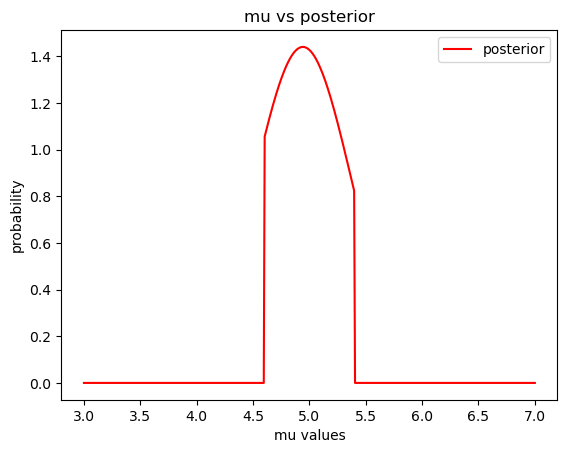

The lower bound of the 68.3% region is 4.73 and the sample mean minus the standard error is 4.61
The upper bound of the 68.3% region is 5.24 and the sample mean plus the standard error is 5.61
The MAP value for a unform prior of 4.6-5.4 is 4.939879759519038


In [8]:
# Part 5

p_u_46_54 = lambda mu: 1/0.8 if 4.6 <= mu <= 5.4 else 0
p_v_46_54 = [posterior(mu, v, uncert, p_u_46_54) for mu in mu_grid]
p_v_46_54 /= np.trapz(p_v_46_54, mu_grid)

plt.plot(mu_grid, p_v_46_54, color = 'red', label = 'posterior')
plt.xlabel('mu values')
plt.ylabel('probability')
plt.title('mu vs posterior')
plt.legend()
plt.show()

c_46_54 = np.cumsum(p_v_46_54) * (mu_grid[1] - mu_grid[0])
lb_46_54 = mu_grid[np.argmin(np.abs(c_46_54 - 0.1585))]
ub_46_54 = mu_grid[np.argmin(np.abs(c_46_54 - 0.8415))]
m_46_54 = mu_grid[np.argmax(p_v_46_54)]

print(f'The lower bound of the 68.3% region is {lb_46_54:.2f} and the sample mean minus the standard error is {sm_m_ste:.2f}')
print(f'The upper bound of the 68.3% region is {ub_46_54:.2f} and the sample mean plus the standard error is {sm_p_ste:.2f}')
print('The MAP value for a unform prior of 4.6-5.4 is', m_46_54)

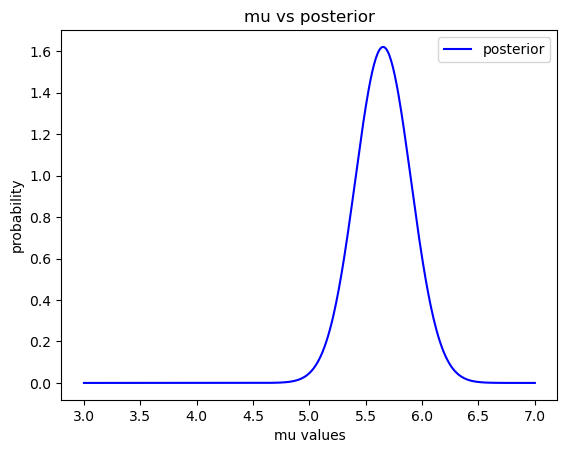

The lower bound of the 68.3% region is 5.40 and the sample mean minus the standard error is 4.61
The upper bound of the 68.3% region is 5.89 and the sample mean plus the standard error is 5.61
The MAP value for a gaussian prior is 5.653306613226453


In [10]:
# Part 6

p_g = lambda mu: stats.norm.pdf(mu, 6, 0.3)
p_v_g = [posterior(mu, v, uncert, p_g) for mu in mu_grid]
p_v_g /= np.trapz(p_v_g, mu_grid)

plt.plot(mu_grid, p_v_g, color = 'blue', label = 'posterior')
plt.xlabel('mu values')
plt.ylabel('probability')
plt.title('mu vs posterior')
plt.legend()
plt.show()

c_g = np.cumsum(p_v_g) * (mu_grid[1]-mu_grid[0])
lb_g = mu_grid[np.argmin(np.abs(c_g - 0.1585))]
ub_g = mu_grid[np.argmin(np.abs(c_g - 0.8415))]
m_g = mu_grid[np.argmax(p_v_g)]

print(f'The lower bound of the 68.3% region is {lb_g:.2f} and the sample mean minus the standard error is {sm_m_ste:.2f}')
print(f'The upper bound of the 68.3% region is {ub_g:.2f} and the sample mean plus the standard error is {sm_p_ste:.2f}')
print('The MAP value for a gaussian prior is', m_g)

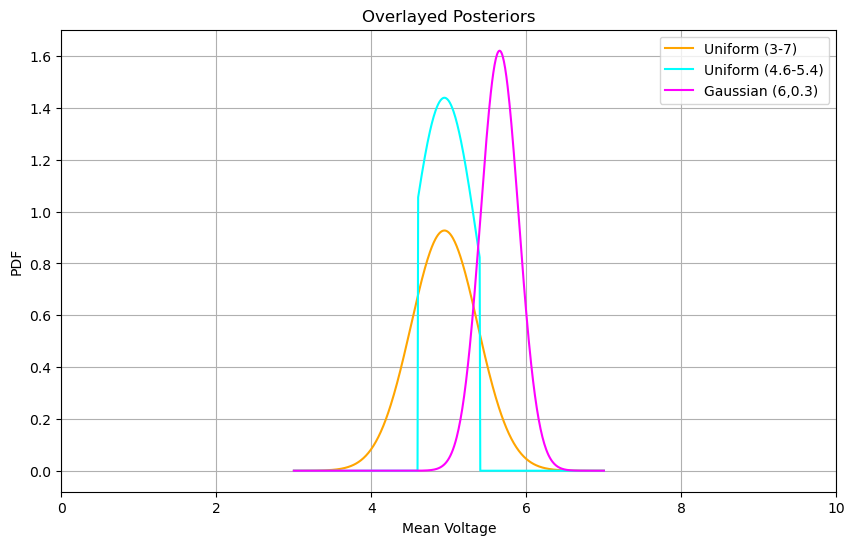

In [12]:
# Part 7

plt.figure(figsize = (10,6))
plt.plot(mu_grid, p_v_3_7, color = 'orange', label = 'Uniform (3-7)')
plt.plot(mu_grid, p_v_46_54, color = 'cyan', label = 'Uniform (4.6-5.4)')
plt.plot(mu_grid, p_v_g, color = 'fuchsia', label = 'Gaussian (6,0.3)')
plt.xlim(0,10)
plt.xlabel('Mean Voltage')
plt.ylabel('PDF')
plt.title('Overlayed Posteriors')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# Part 8

d_p = lambda mu: 1 if mu == b_fit_mu else 0
e_d = posterior(b_fit_mu, v, uncert, d_p)
e_u = np.trapz(p_v_3_7, mu_grid)
b_f = e_d/e_u

print(f'Delta prior evidence: {e_d:.4e}')
print(f'Uniform prior evidence: {e_u:.4e}')
print(f'Bayes Factor: {b_f}')
print('The delta prior is strongly favored')
print('The large bayes factor shows there significant Occam penalty for wider priors' )


Delta prior evidence: 1.0726e-07
Uniform prior evidence: 1.0000e+00
Bayes Factor: 1.072582618057022e-07
The delta prior is strongly favored
The large bayes factor shows there significant Occam penalty for wider priors


## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [24]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x = data[0,:]
    y = data[1,:]
    sigma_y = data[2,:]
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

In [25]:
# Part 1

data2 = np.load('C:/Users/JoeK33p/Documents/GitHub/ASTR_3300_S2025/coursework/homeworks/hw_data/hw4_data_2.npy')
x = data[0,:]
y = data[1,:]
y_s = data[2,:]
y_int = -0.23


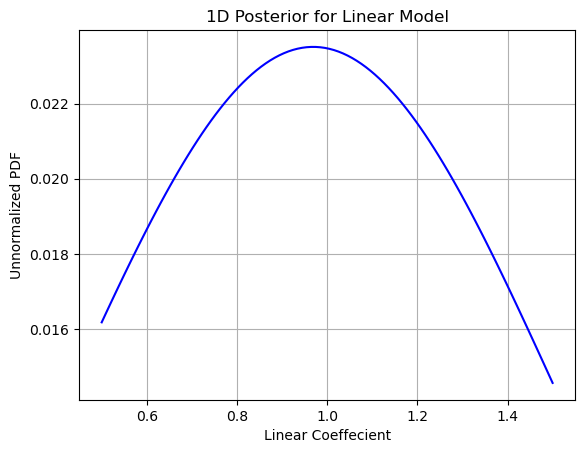

In [28]:
# Part 2

t1_grid = np.linspace(0.5, 1.5, 100)
p_1d = np.array([np.exp(logL([y_int,t1],data)) for t1 in t1_grid])

plt.plot(t1_grid, p_1d, color = 'blue')
plt.xlabel('Linear Coeffecient')
plt.ylabel('Unnormalized PDF')
plt.title('1D Posterior for Linear Model')
plt.grid(True)
plt.show()


In [29]:
# Part 3

e_1d = np.trapz(p_1d, t1_grid)

print(f'Evidence for Linear model: {e_1d:.3e}')

Evidence for Linear model: 2.054e-02


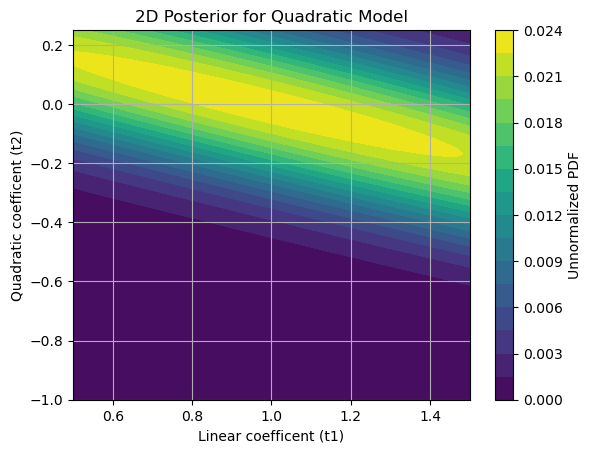

In [32]:
# Part 4

t2_grid = np.linspace(-1, 0.25, 100)
p_2d = np.zeros((len(t2_grid), len(t1_grid)))

for i, t2 in enumerate(t2_grid):
    for j, t1 in enumerate(t1_grid):
        p_2d[i, j] = np.exp(logL([y_int, t1, t2], data))
        
t1_mesh, t2_mesh = np.meshgrid(t1_grid, t2_grid)
plt.contourf(t1_mesh, t2_mesh, p_2d, levels = 20)
plt.xlabel('Linear coefficent (t1)')
plt.ylabel('Quadratic coefficent (t2)')
plt.title('2D Posterior for Quadratic Model')
plt.colorbar(label = 'Unnormalized PDF')
plt.grid(True)
plt.show()

In [33]:
# Part 5

e_2d = np.trapz(np.trapz(p_2d, t1_grid), t2_grid)

print(f'Evidence for the quadratic model: {e_2d:.3e}')


Evidence for the quadratic model: 9.736e-03


In [35]:
# Part 6

b_f = e_2d/e_1d

print(f'Bayes Factor for quadratic/linear: {b_f:.3f}')
print('Because the value is less than 1 the linear model is favored.')

Bayes Factor for quadratic/linear: 0.474
Because the value is less than 1 the linear model is favored.
